In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, xlabel, ylabel, xlim, ylim, title, grid, legend, show
from IPython.display import Image,display
import warnings
warnings.filterwarnings('ignore')
from gaussxw import gaussxwab
from numpy import linspace, sqrt, meshgrid, zeros, loadtxt, shape, empty
from math import pi
from matplotlib.pyplot import imshow, show, colorbar, xlim, ylim, axis, title, quiver

## Ejercicio 8: el procesamiento de imágenes y el microscopio de efecto túnel .

Cuando la luz incide sobre una superficie, la cantidad que penetra por unidad de superficie depende no sólo de la intensidad de la luz, sino también del ángulo de incidencia. Si la luz forma un ángulo θ con la normal, sólo sólo "ve" cos θ de área por unidad de área real en la superficie:

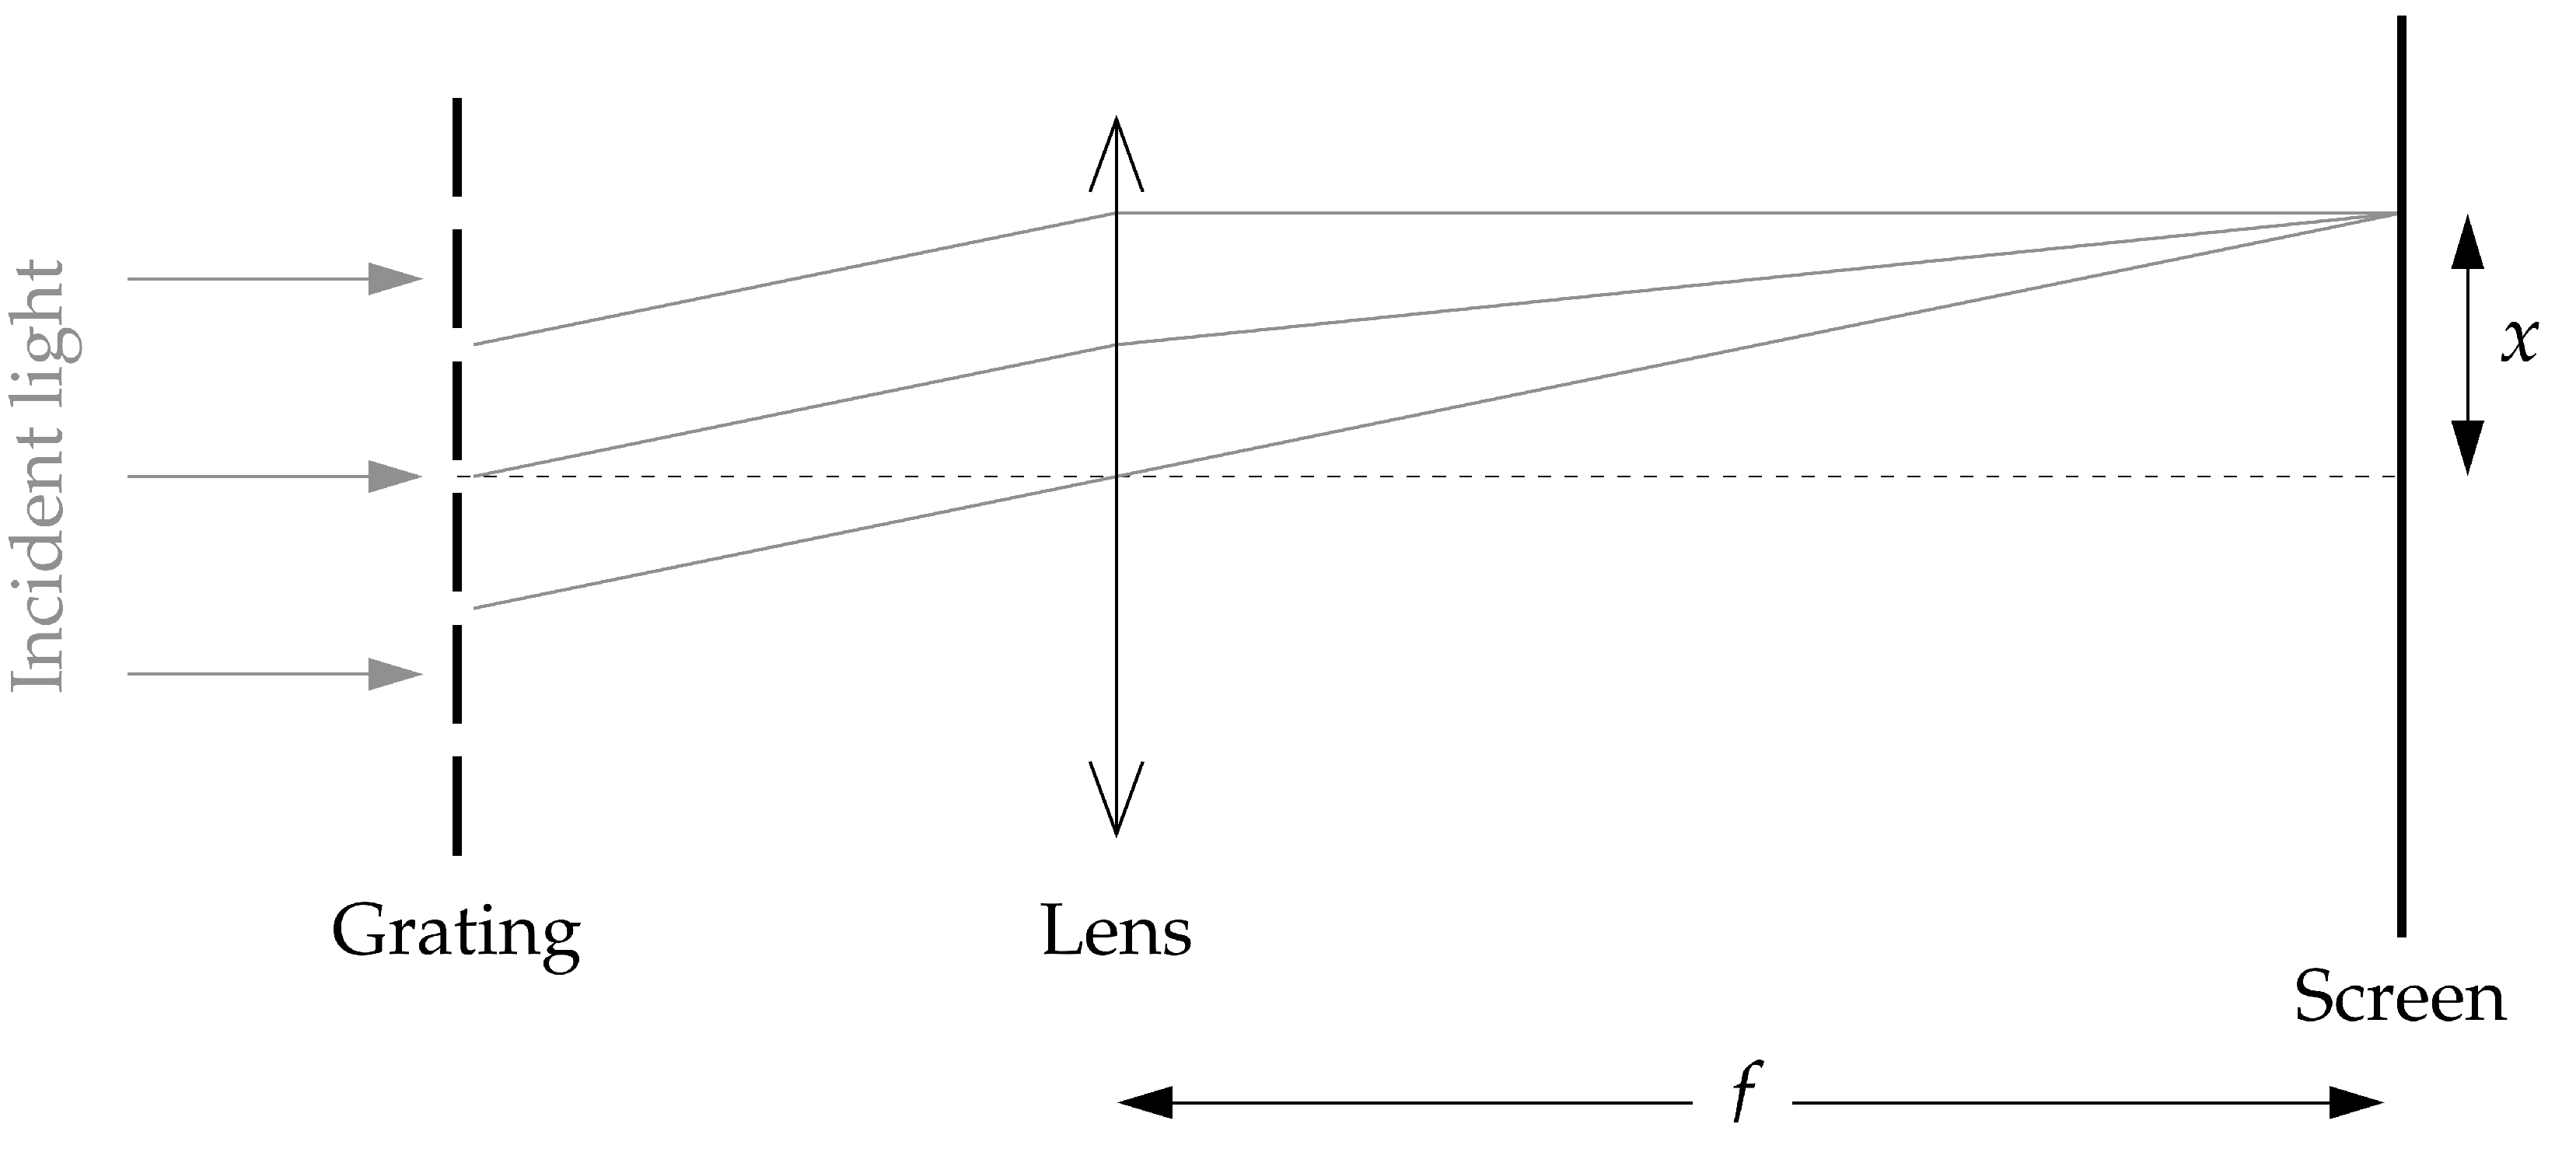

In [13]:
display(Image(filename ="light.png", width=450, height=450))

Así, la intensidad de la iluminación es a $cos θ$, siendo $a$ la intensidad total de la luz. Esta sencilla ley física es un elemento central de las gráficas en 3D. Nos permite calcular cómo incide la luz la luz sobre los objetos tridimensionales y, por lo tanto, cómo se verán cuando se les ilumine desde diferentes ángulos. 

Supongamos, por ejemplo, que estamos mirando la Tierra desde arriba y vemos montañas. Conocemos la altura de las montañas $w(x,y)$ en función de su posición en el plano, por lo que la ecuación de la superficie de la Tierra es simplemente $z = w(x,y)$, o, de forma equivalente, $w(x,y)-z = 0$, y el vector normal $\bf v$ a la superficie viene dado por el gradiente de $w(x,y)-z$ así:

$${\bf v}=\nabla[z-w(x,y)]=\left(\begin{array}{c}\partial/\partial x \\\partial/\partial y\\\partial/\partial z\end{array}\right)[z-w(x,y)]=\left(\begin{array}{c}\partial w/\partial x \\\partial w/\partial y\\1\end{array}\right).$$

Ahora supongamos que tenemos una luz que entra representada por un vector a con magnitud igual a la intensidad de la luz. Entonces el producto punto de los vectores ${\bf a}$ y ${\bf v}$ es

$${\bf a}\cdot {\bf v}=\vert {\bf a}\vert \vert {\bf v}\vert \cos \theta,$$

donde θ es el ángulo entre los dos vectores. Por tanto, la intensidad de la iluminación de la superficie de las montañas es 

$$I=\vert {\bf a}\vert \cos \theta=\frac{{\bf a}\cdot {\bf v}}{\vert {\bf v}\vert}=\frac{-a_x(\partial  w/\partial x)-a_y(\partial  w/\partial y)+a_z}{\sqrt{(\partial w/\partial x)^2+(\partial w/\partial y)^2+1}}.$$


Tomemos un caso sencillo en el que la luz incide horizontalmente con intensidad unitaria, a lo largo de una línea un ángulo φ en sentido contrario al de las agujas del reloj desde el eje este-oeste, de modo que a = (cos φ, sin φ, 0). Entonces nuestra intensidad de iluminación se simplifica a

$$I=\frac{-\cos\phi(\partial  w/\partial x)+\sin\phi(\partial  w/\partial y)}{\sqrt{(\partial w/\partial x)^2+(\partial w/\partial y)^2+1}}.$$

Si podemos calcular las derivadas de la altura $w(x,y)$ y conocemos φ podemos calcular la intensidad en cualquier punto.

---

1. En la carpeta de datos del tema 4 hay un archivo llamado altitude.txt, que contiene la altitud $w(x,y)$ en metros sobre el nivel del mar (o profundidad bajo el nivel del mar) de la superficie de la Tierra, medida en una cuadrícula de puntos $(x,y)$. Escribe un programa que lea este fichero y almacene los datos en una matriz. los datos en una matriz. Luego calcula las derivadas ∂w/∂x y ∂w/∂y en cada punto de la cuadrícula.

    Explica qué método has utilizado para calcularlas y por qué. (Sugerencia: probablemente tendrás que utilizar más de un método para obtener cada punto de la cuadrícula para poder calcular los  bordes). Para calcular las derivadas necesitarás conocer el valor de $h$, la distancia en metros entre los puntos de la cuadrícula, que en este caso es de unos 30 000 m. (En realidad, no es constante porque estamos representando la Tierra esférica en un mapa plano, pero  h = 30 000 m dará resultados razonables).

---

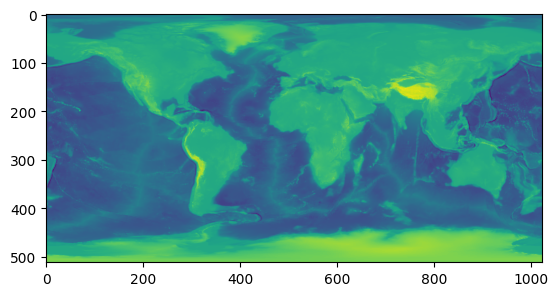

In [14]:
alt = loadtxt("altitude.txt", float)
imshow(alt)
show()

h = 30000
m, n = alt.shape
x = list(range(n))
y = list(range(m))
    
dfn = zeros([m, n])

for i in range(m):
    dfn[i, 0] = (alt[i, 1] - alt[i, 0]) / h
    for j in range(1, n - 1):
        dfn[i, j + 1] = (alt[i, j] - alt[i, j - 1]) / h
    dfn[i, n - 1] = (alt[i, n - 1] - alt[i, n - 2]) / h


 
dfn1 = zeros([m, n])

for i in range(n):
    dfn1[0, i] = (alt[1, i] - alt[0, i]) / h
    for j in range(1, m - 1):
        dfn1[j + 1, i] = (alt[j, i] - alt[j - 1, i]) / h
    dfn1[m - 1, i] = (alt[m - 1, i] - alt[m - 2, i]) / h


def I(phi, wx, wy):
    from numpy import sqrt, cos, sin
    return (-cos(phi) * wx + sin(phi) * wy) / sqrt(wx**2 + wy**2 + 1)

2. Ahora, utilizando tus valores para las derivadas, calcula la intensidad para cada punto de la cuadrícula, con $φ = 45^◦$ , y haz un gráfico de densidad de los valores resultantes en el que el brillo de cada punto depende del valor de intensidad correspondiente. Si lo haces bien, el gráfico debería parecerse a un mapa en relieve del mundo: deberías poder ver los continentes y las cadenas montañosas en 3D. (Los problemas más comunes son un mapa que está al revés o lateral, o un mapa de relieve que está "al revés", es decir, que las regiones altas se ven bajas y viceversa. viceversa. Trabaje con los detalles de su programa hasta que consiga un mapa que le parezca correcto).

    Sugerencia: Tenga en cuenta que el valor de la intensidad $I$ de la fórmula anterior puede ser positivo o negativo: va de +1 a -1. Que haya una intensidad negativa implica que la zona en cuestión está en la sombra, y no recibe ninguna luz. Se podría representar esto coloreando esas zonas del mapa completamente aunque, en la práctica, obtendrá una imagen más bonita (aunque podría decirse que menos fiel a la realidad) utilizando simplemente una gama continua de grises de +1 a -1.    
    
---

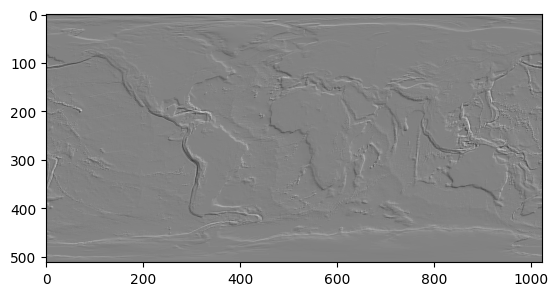

In [15]:
phi = pi / 4
sol = zeros([m, n])

for i in range(m):
    for j in range(n):
        sol[i, j] += I(phi, dfn[i, j], dfn1[i, j])


imshow(sol, cmap = "gray")
show()

3. En la carpeta de datos del tema 1 se encuentra el fichero stm.txt, que contiene una cuadrícula de valores de las mediciones de un microscopio de efecto túnel de la superficie del silicio. Un microscopio de efecto túnel (STM) es un dispositivo que mide la forma de las superficies a a nivel atómico siguiendo una punta afilada sobre la superficie y midiendo la corriente cuántica asociada al efecto túnel en función de la posición. El resultado final es una cuadrícula de valores que representan la altura de la superficie en función de la posición y los datos del archivo stm.txt contienen precisamente esa cuadrícula de valores. Modifica el programa que acabas de escribir para visualizar los datos del STM y así crear una imagen en 3D del aspecto de la superficie de silicio. El valor de h para las derivados en este caso es de alrededor de h = 2,5 (en unidades arbitrarias).

---

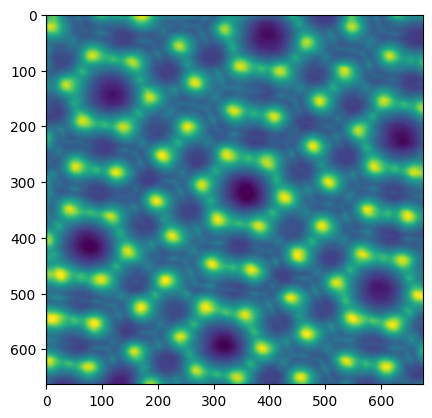

In [16]:
dat = loadtxt("stm.txt", float)
imshow(dat)
show()

h = 2.5
m, n = dat.shape

x = list(range(n))
y = list(range(m))
    
dfn = zeros([m, n])

for i in range(m):
    dfn[i, 0] = (dat[i, 1] - dat[i, 0]) / h
    for j in range(1, n - 1):
        dfn[i, j + 1] = (dat[i, j] - dat[i, j - 1]) / h
    dfn[i, n - 1] = (dat[i, n - 1] - dat[i, n - 2]) / h


dfn1 = zeros([m, n])

for i in range(n):
    dfn1[0, i] = (dat[1, i] - dat[0, i]) / h
    for j in range(1, m - 1):
        dfn1[j + 1, i] = (dat[j, i] - dat[j - 1, i]) / h
    dfn1[m - 1, i] = (dat[m - 1, i] - dat[m - 2, i]) / h


def I(phi, wx, wy):
    from numpy import sqrt, cos, sin
    return (-cos(phi) * wx + sin(phi) * wy) / sqrt(wx**2 + wy**2 + 1)

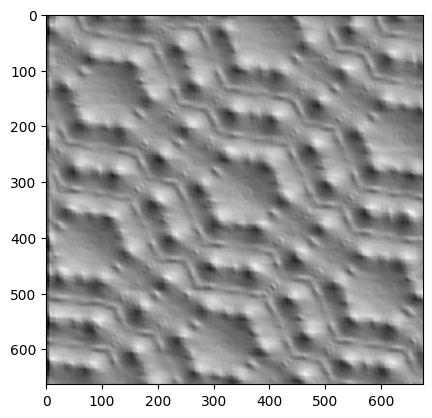

In [17]:
phi = pi / 4
sol = zeros([m, n])

for i in range(m):
    for j in range(n):
        sol[i, j] = I(phi, dfn[i, j], dfn1[i, j])
        

imshow(sol, cmap = "gray")
show()